# Análisis exploratorio de feature selection
##Completitud de variables,
##Varianza de variables
## Determinar qué variables vale la pena eliminar/mantener

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/dreamAD"

final_merged_data.csv


In [4]:
#Read file
file_path = '/content/drive/My Drive/dreamAD/final_merged_data.csv'
data = pd.read_csv(file_path)


In [5]:
data.head()

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218


In [6]:
data.shape

(84, 7099)

## 1. Variable completeness


In [7]:
np.random.seed(123)

In [8]:
#Check missing values
missing_count = data.isnull().sum()
print(missing_count[missing_count > 0])

Series([], dtype: int64)


In [49]:
def completeness_analysis(df: pd.DataFrame, threshold_completeness: float = 0) -> pd.DataFrame:
    """
    Calculates the percentage of NON-zero values for each numeric column in a DataFrame.
    """
    #Select only columns of numeric type
    numerics = df.select_dtypes(include=np.number)
    #print(numerics)
    #Calculate the percentage of non-zero values for each column
    completeness = numerics.apply(lambda col: (col != 0).sum() / len(col) * 100)

    #Create dataframe
    df_completeness = completeness.reset_index()
    df_completeness.columns = ['Variable', 'completeness_Pct']

    #Filter data
    #Only data beyond threshold
    df_completeness_th = df_completeness[df_completeness['completeness_Pct'] > threshold_completeness]

    #Sort the results to see the variables with the lowest completeness.
    #df_completeness_th = df_completeness_th.sort_values(by='completeness_Pct', ascending=True)

    #make it a list of numerical variables that passed the filter
    vars_filtered = df_completeness_th['Variable'].tolist()

    #List of non-numeric variables to keep them forever.
    non_numeric_vars = df.select_dtypes(exclude=np.number).columns.tolist()

    #Final merge
    final_cols = non_numeric_vars + vars_filtered

    #Filter final dataframe
    filtered_df = df[final_cols]
    # Devolver ambos DataFrames
    return filtered_df, df_completeness, df_completeness_th

In [42]:
#Run completeness analysis
#First with no filter to explore data

completeness_filtered, completeness_data_noth, df_completeness_th = completeness_analysis(df=data, threshold_completeness=0)

In [43]:
#Explore data
completeness_filtered.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.021958,0.206852,-0.197567,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


In [44]:
completeness_data_noth.head(10)

,Variable,completeness_Pct
0,Age at Death,100.000000
1,Years of education,100.000000
2,PMI,100.000000
3,APOE Genotype,98.809524
4,Thal,89.285714
5,Braak,97.619048
6,CERAD,80.952381
7,ADNC,89.285714
8,percent 6e10 positive area,98.809524
9,percent AT8 positive area,100.000000


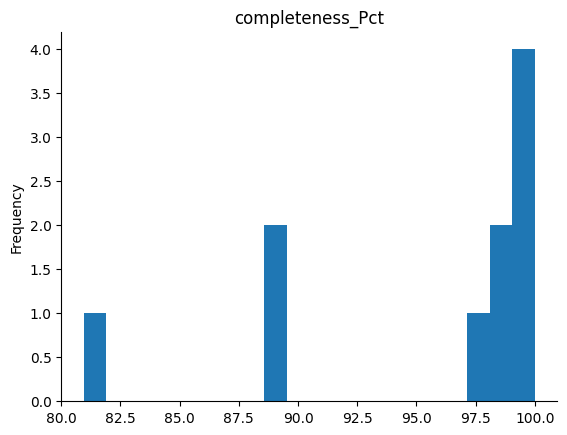

In [40]:
from matplotlib import pyplot as plt
_df_10['completeness_Pct'].plot(kind='hist', bins=20, title='completeness_Pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [47]:
df_completeness_th.head(10)

,Variable,completeness_Pct
0,Age at Death,100.000000
1,Years of education,100.000000
2,PMI,100.000000
3,APOE Genotype,98.809524
4,Thal,89.285714
5,Braak,97.619048
6,CERAD,80.952381
7,ADNC,89.285714
8,percent 6e10 positive area,98.809524
9,percent AT8 positive area,100.000000


from matplotlib import pyplot as plt
_df_12['completeness_Pct'].plot(kind='hist', bins=20, title='completeness_Pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['completeness_Pct'].plot(kind='line', figsize=(8, 4), title='completeness_Pct')
plt.gca().spines[['top', 'right']].set_visible(False)

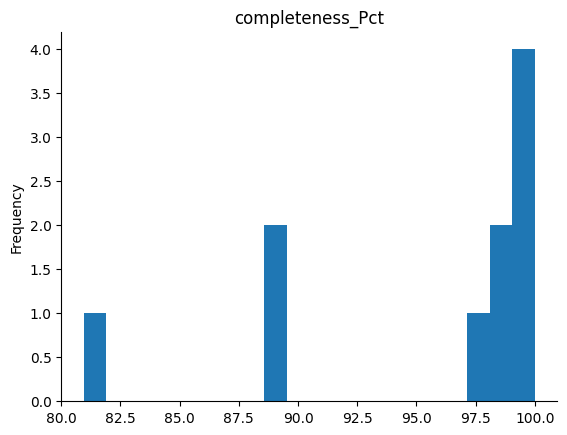

In [48]:
from matplotlib import pyplot as plt
_df_12['completeness_Pct'].plot(kind='hist', bins=20, title='completeness_Pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
completeness_filter.describe()

,deg_mean_L6-IT-Car3_MTG,deg_median_L6-IT-Car3_MTG,kcore_max_L6-IT-Car3_MTG,largest_community_size_L6-IT-Car3_MTG,diameter_L6-IT-Car3_MTG,avg_path_len_L6-IT-Car3_MTG,n_edges_L6-IT-Car3_MTG,n_nodes_L6-IT-Car3_MTG,n_components_L6-IT-Car3_MTG,frac_giant_component_L6-IT-Car3_MTG,...,93_Lamp5_MTG,92_Lamp5_MTG,91_Lamp5_MTG,Race_8,Race_7,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG,Age at Death
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.0,84.0,84.000000,84.000000,84.000000,84.000000,84.00000
mean,1.163337,0.827381,1.154762,56.666667,3.428571,1.632159,724.976190,210.309524,16.845238,0.371684,...,0.051822,0.112946,0.208533,1.0,1.0,-0.273088,-0.007192,0.236816,0.281061,88.72619
std,1.456097,0.967838,1.571539,464.242441,4.128320,1.637489,5292.918376,1072.500310,48.678066,0.373026,...,0.152511,0.083214,0.116152,0.0,0.0,0.135040,0.147175,0.112559,0.181469,8.02909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.190018,-0.274578,-0.144148,1.0,1.0,-0.579396,-0.141161,-0.073154,-0.652713,65.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.029436,0.116496,0.149507,1.0,1.0,-0.335699,-0.079400,0.221074,0.269545,83.75000
50%,1.267943,1.000000,1.000000,4.000000,2.500000,1.666667,4.000000,5.500000,1.000000,0.328947,...,-0.013476,0.129639,0.262400,1.0,1.0,-0.322734,-0.058892,0.250659,0.278849,90.00000
75%,1.774038,1.000000,2.000000,8.000000,5.000000,2.720280,27.000000,35.250000,7.000000,0.646598,...,0.083766,0.140106,0.280234,1.0,1.0,-0.272925,-0.016400,0.278197,0.342853,94.00000
max,11.227786,7.000000,12.000000,4260.000000,20.000000,6.040234,47763.000000,8508.000000,267.000000,1.000000,...,0.542514,0.250587,0.460580,1.0,1.0,0.273217,0.657607,0.495933,0.686444,102.00000


##2. Variance of variables

In [12]:
def variance(df):
    """
    Calculates variance only for numeric variables in a DataFrame.
    Displays a sorted table and returns the DataFrame.
    """

    if isinstance(df, dict):
        df = pd.DataFrame(df)

    num_vars = df.select_dtypes(include=["number"])
    var_num = num_vars.var().sort_values(ascending=False).to_frame("Variance")
    #print(" Varianza de variables numéricas:")
    display(var_num)

    return var_num

In [13]:
variance_vars = variance(data)

,Variance
n_edges_L5-IT_MTG,6.895924e+09
n_edges_L2-3-IT_A9,6.305776e+09
n_edges_L2-3-IT_MTG,5.859007e+09
n_edges_L5-IT_A9,5.731587e+09
n_edges_Pvalb_MTG,3.492076e+09
...,...
deg_mean_VLMC_A9,0.000000e+00
assortativity_L5-ET_A9,0.000000e+00
clustering_global_L5-ET_A9,0.000000e+00
largest_community_size_L5-ET_MTG,0.000000e+00


In [14]:
def variance(df, quartile=4):
    """
    Calcula la varianza de las variables numéricas en un DataFrame
    y devuelve solo las que caen en el cuartil especificado (1–4).

    Parámetros:
    -----------
    df : DataFrame o dict
        Datos de entrada.
    quartile : int (1, 2, 3 o 4)
        Cuartil a conservar:
        - 1: 0%–25%
        - 2: 25%–50%
        - 3: 50%–75%
        - 4: 75%–100%
    """
    if isinstance(df, dict):
        df = pd.DataFrame(df)

    num_vars = df.select_dtypes(include=["number"])
    var_num = num_vars.var().to_frame("Variance")

    # calcular cuartiles
    q0 = np.quantile(var_num["Variance"], 0.00)
    q1 = np.quantile(var_num["Variance"], 0.25)
    q2 = np.quantile(var_num["Variance"], 0.50)
    q3 = np.quantile(var_num["Variance"], 0.75)
    q4 = np.quantile(var_num["Variance"], 1.00)

    bounds = {
        1: (q0, q1),
        2: (q1, q2),
        3: (q2, q3),
        4: (q3, q4)
    }

    low, high = bounds[quartile]
    var_num = var_num[(var_num["Variance"] >= low) & (var_num["Variance"] <= high)]

    var_num = var_num.sort_values("Variance", ascending=False)

    display(var_num)
    return var_num

In [15]:
variance_filter = varianced(data, 3)
variance_filter

,Variance
4_Sst_A9,0.042098
32_L6-CT_A9,0.042057
46_Oligodendrocyte_A9,0.042055
107_L2-3-IT_A9,0.042055
120_L5-IT_MTG,0.042045
...,...
77_Pax6_A9,0.010338
77_VLMC_A9,0.010338
37_L6b_MTG,0.010335
perc_targeted_50_Pvalb_A9,0.010334


,Variance
4_Sst_A9,0.042098
32_L6-CT_A9,0.042057
46_Oligodendrocyte_A9,0.042055
107_L2-3-IT_A9,0.042055
120_L5-IT_MTG,0.042045
...,...
77_Pax6_A9,0.010338
77_VLMC_A9,0.010338
37_L6b_MTG,0.010335
perc_targeted_50_Pvalb_A9,0.010334


In [16]:
def varianced(df, quartile=4, keep_non_numeric=True):
    """
      Filters columns of a DataFrame according to variance and returns
    a new DataFrame with variables that fall within the specified quartile.

    Parameters:
    -----------
    df : DataFrame or dict
        Input data.
    quartile : int (1, 2, 3, or 4)
        Quartile to keep:
        - 1: 0%–25%
        - 2: 25%–50%
        - 3: 50%–75%
        - 4: 75%–100%
    keep_non_numeric : bool
        If True, also keeps non-numeric columns.
    """
    if isinstance(df, dict):
        df = pd.DataFrame(df)

    num_vars = df.select_dtypes(include=["number"])
    var_num = num_vars.var().to_frame("Variance")

    #calculate quartiles
    q0 = np.quantile(var_num["Variance"], 0.00)
    q1 = np.quantile(var_num["Variance"], 0.25)
    q2 = np.quantile(var_num["Variance"], 0.50)
    q3 = np.quantile(var_num["Variance"], 0.75)
    q4 = np.quantile(var_num["Variance"], 1.00)

    bounds = {
        1: (q0, q1),
        2: (q1, q2),
        3: (q2, q3),
        4: (q3, q4)
    }

    low, high = bounds[quartile]
    selected_vars = var_num[
        (var_num["Variance"] >= low) & (var_num["Variance"] <= high)
    ].index.tolist()

    #assemble the new filtered DataFrame
    if keep_non_numeric:
        non_num_vars = df.select_dtypes(exclude=["number"]).columns.tolist()
        filtered_df = df[non_num_vars + selected_vars]
    else:
        filtered_df = df[selected_vars]

    #display table of selected variances
    #display(var_num.loc[selected_vars].sort_values("Variance", ascending=False))

    return filtered_df

In [17]:
variance_filtered = varianced(data, 3, keep_non_numeric=True)
variance_filtered

,Donor ID,Race_0,Race_1,Race_3,Race_4,Race_5,Race_6,Race_9,Race_10,Race_11,...,115_Lamp5_MTG,117_Lamp5_MTG,119_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,-0.086568,0.381675,0.161838,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,-0.109931,0.420087,-0.091992,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.323906,0.717464,-0.307499,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,-0.094615,0.500354,-0.111411,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,-0.051914,0.104130,0.052125,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H21-33-038,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,-0.120912,0.436106,-0.079534,0.459463,-0.096722,0.299265,-0.326740,-0.077092,0.229999,0.270455
80,H21-33-033,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,-0.185124,0.833003,-0.028790,0.620363,0.141038,0.612757,-0.463859,-0.130085,0.403437,0.247689
81,H21-33-034,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,-0.115791,0.417077,-0.084603,0.456178,-0.100294,0.288078,-0.323124,-0.079618,0.227240,0.272084
82,H21-33-030,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,-0.130728,0.441795,-0.079577,0.465779,-0.094935,0.298078,-0.332700,-0.088243,0.238463,0.271958


### 3. Outliers (Flooring and caping)

In [18]:
def flooring_capping(df: pd.DataFrame,
                                 lower_quantile: float = 0.05,
                                 upper_quantile: float = 0.95) -> pd.DataFrame:
    """
    Applies flooring and capping to all numeric columns in a DataFrame using the quantiles method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        lower_quantile (float): The lower quantile to define the floor.
        upper_quantile (float): The upper quantile to define the ceiling.

    Returns:
        pd.DataFrame: A new DataFrame with the outliers handled.
    """

    #Select only the numeric columns and create a copy to avoid SettingWithCopyWarning
    numeric_cols = df.select_dtypes(include=np.number).columns
    df_copy = df.copy()

    for col in numeric_cols:
        #Calculate the lower and upper limits using the specified quantiles.
        lower_limit = df_copy[col].quantile(lower_quantile)
        upper_limit = df_copy[col].quantile(upper_quantile)

        #Apply flooring y capping
        df_copy[col] = df_copy[col].clip(lower=lower_limit, upper=upper_limit)

    return df_copy

In [19]:
floo_filter = flooring_capping(df=completeness_filter, lower_quantile = 0.05,
                                 upper_quantile = 0.95)

In [20]:
floo_filter.shape

(84, 6534)

In [21]:
floo_filter.describe()

,deg_mean_L6-IT-Car3_MTG,deg_median_L6-IT-Car3_MTG,kcore_max_L6-IT-Car3_MTG,largest_community_size_L6-IT-Car3_MTG,diameter_L6-IT-Car3_MTG,avg_path_len_L6-IT-Car3_MTG,n_edges_L6-IT-Car3_MTG,n_nodes_L6-IT-Car3_MTG,n_components_L6-IT-Car3_MTG,frac_giant_component_L6-IT-Car3_MTG,...,93_Lamp5_MTG,92_Lamp5_MTG,91_Lamp5_MTG,Race_8,Race_7,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG,Age at Death
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.0,84.0,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1.042382,0.767857,1.035714,5.449405,3.205357,1.588835,52.318452,57.270833,12.705357,0.371684,...,0.051709,0.116944,0.209449,1.0,1.0,-0.277198,-0.013247,0.235994,0.288724,88.895833
std,0.917126,0.700458,1.011338,6.544608,3.478973,1.539050,117.065165,132.636947,31.196003,0.373026,...,0.140354,0.058491,0.105129,0.0,0.0,0.094403,0.118214,0.101575,0.108741,7.419123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.102645,-0.076361,-0.059874,1.0,1.0,-0.349511,-0.095681,-0.004337,-0.038482,72.450000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.029436,0.116496,0.149507,1.0,1.0,-0.335699,-0.079400,0.221074,0.269545,83.750000
50%,1.267943,1.000000,1.000000,4.000000,2.500000,1.666667,4.000000,5.500000,1.000000,0.328947,...,-0.013476,0.129639,0.262400,1.0,1.0,-0.322734,-0.058892,0.250659,0.278849,90.000000
75%,1.774038,1.000000,2.000000,8.000000,5.000000,2.720280,27.000000,35.250000,7.000000,0.646598,...,0.083766,0.140106,0.280234,1.0,1.0,-0.272925,-0.016400,0.278197,0.342853,94.000000
max,2.590315,2.000000,3.000000,22.550000,10.850000,4.620708,450.950000,527.350000,121.650000,1.000000,...,0.428932,0.192021,0.299987,1.0,1.0,-0.062684,0.348766,0.400207,0.486620,99.000000


## 3.Linear correlation between variables.

In [22]:
def weak_linear_correlation_pairs(df, low=-0.25, high=0.25):
    """
    Returns ALL variable pairs whose Pearson correlation lies within [low, high].
    Only numeric columns are considered.

    """
    # Ensure DataFrame
    if isinstance(df, dict):
        df = pd.DataFrame(df)
    elif isinstance(df, str) and df.lower().endswith(('.csv', '.tsv')):
        sep = '\t' if df.lower().endswith('.tsv') else ','
        df = pd.read_csv(df, sep=sep)
    if not isinstance(df, pd.DataFrame):
        raise TypeError("df must be a pandas DataFrame, dict, or path to .csv/.tsv")

    # Keep only numeric columns
    num_vars = df.select_dtypes(include=["number"])
    if num_vars.shape[1] < 2:
        return pd.DataFrame(columns=["Variable_1", "Variable_2", "Correlation"])

    # Pearson correlation matrix
    corr = num_vars.corr(method="pearson")

    # Upper triangle only (exclude duplicates and diagonal)
    mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
    pairs = corr.where(mask).stack().reset_index()
    pairs.columns = ["Variable_1", "Variable_2", "Correlation"]

    # Filter by correlation interval
    weak = pairs[(pairs["Correlation"] >= low) & (pairs["Correlation"] <= high)] \
            .sort_values(by="Correlation", ascending=True) \
            .reset_index(drop=True)

    return weak

In [24]:
all_weak_pairs = weak_linear_correlation_pairs(data, low=-0.25, high=0.25)

print(all_weak_pairs.shape)
display(all_weak_pairs)

(17996195, 3)


,Variable_1,Variable_2,Correlation
0,81_Pax6_MTG,90_Microglia-PVM_MTG,-0.250000
1,67_L6b_MTG,23_Lamp5_A9,-0.250000
2,72_L6-CT_MTG,8_L2-3-IT_A9,-0.250000
3,116_L6-IT_MTG,2_L6b_A9,-0.250000
4,71_Sncg_MTG,91_L2-3-IT_MTG,-0.250000
...,...,...,...
17996190,global_density_Chandelier_MTG,107_Pvalb_MTG,0.249999
17996191,51_Lamp5-Lhx6_MTG,90_VLMC_A9,0.250000
17996192,97_L6b_MTG,100_Pvalb_MTG,0.250000
17996193,global_density_Lamp5-Lhx6_A9,123_VLMC_MTG,0.250000


In [25]:
all_weak_pairs.head(10)

,Variable_1,Variable_2,Correlation
0,81_Pax6_MTG,90_Microglia-PVM_MTG,-0.250000
1,67_L6b_MTG,23_Lamp5_A9,-0.250000
2,72_L6-CT_MTG,8_L2-3-IT_A9,-0.250000
3,116_L6-IT_MTG,2_L6b_A9,-0.250000
4,71_Sncg_MTG,91_L2-3-IT_MTG,-0.250000
5,79_L6-CT_MTG,84_L6-CT_MTG,-0.250000
6,98_Oligodendrocyte_A9,53_L5-6-NP_MTG,-0.250000
7,83_L5-IT_MTG,108_Sncg_MTG,-0.249999
8,37_L6-IT_A9,3_L5-IT_A9,-0.249999
9,51_L4-IT_A9,86_Pvalb_MTG,-0.249999


## 4. Non-Linear correlation between variables.

## 5.Information value